In [1]:
import numpy as np
import os
import datetime
import pandas as pd
import random
from scipy import stats
# from tqdm import tqdm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import preprocessing
from sklearn import datasets

In [2]:
from sklearn import model_selection
from sklearn import pipeline
from sklearn import tree
from sklearn import dummy
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import decomposition

### Decision Tree

In [4]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
dTree = tree.DecisionTreeClassifier(random_state=0)
model = dTree.fit(features, target)

In [5]:
# Regression Tree - Slits are done by reducing mean squared error
boston = datasets.load_boston()
features = boston.data[:, 0:2]
target = boston.target
dTree = tree.DecisionTreeRegressor(random_state=0)
model = dTree.fit(features, target)

In [11]:
from IPython.display import Image

In [7]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
dTree = tree.DecisionTreeClassifier(random_state=0)
model = dTree.fit(features, target)

In [9]:
dot_data = tree.export_graphviz(dTree, out_file=None, feature_names=iris.feature_names,
                               class_names=iris.target_names)

In [18]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_pdf("iris.pdf")
#Image(graph.create_png())

### Forest
- out of bag score: trees are trained using a subset of observations,those not used are used as a test set to evaluate the performance of the forest
- compares obserrvations true value iwht the prediction form a subset of trees not trained using that observation

In [29]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
dTree = ensemble.RandomForestClassifier(random_state=0, n_jobs=-1, oob_score=True)
model = dTree.fit(features, target)
dTree.oob_score_

C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.9533333333333334

In [20]:
# Regression Tree - Slits are done by reducing mean squared error
boston = datasets.load_boston()
features = boston.data[:, 0:2]
target = boston.target
dTree = ensemble.RandomForestRegressor(random_state=0, n_jobs=-1)
model = dTree.fit(features, target)

C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Feature Importance

In [21]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
dTree = ensemble.RandomForestClassifier(random_state=0, n_jobs=-1)
model = dTree.fit(features, target)
importances = model.feature_importances_

C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
indices = np.argsort(importances)[::-1]
f_names = [iris.feature_names[i] for i in indices]

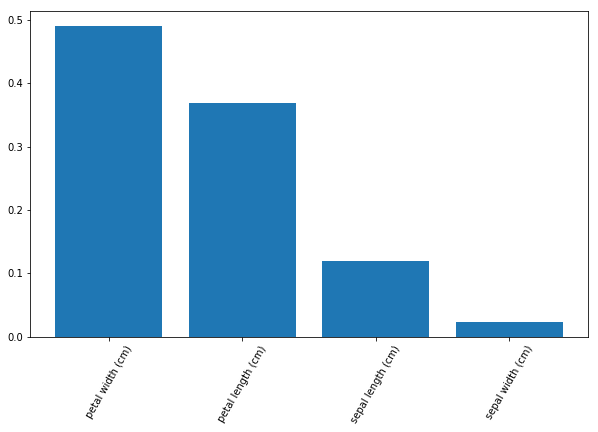

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(range(features.shape[1]), importances[indices])
plt.xticks(range(features.shape[1]), f_names, rotation=60)
plt.show()

In [27]:
importances

array([0.11896532, 0.0231668 , 0.36804744, 0.48982043])

Using trees to reduce features by getting rid of those with less importance
- One-hot encoded may see their feature importance diluted
- highly correlated features will be effectively assinged to one feature and not evenly distributed

Can use the class_weight='balanced' if hihgly imbalanced classes
- class automatically weighted invversely proportional to how frequently they appear
- class weight = (total observations) / (number of classes * number of observations in class)

### Boosting

In [28]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
dTree = ensemble.AdaBoostClassifier(random_state=0)
model = dTree.fit(features, target)

## Neighbors
- find n nearest neighbors and use to predict the class

In [30]:
from sklearn import neighbors

In [32]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
my_scaler = preprocessing.StandardScaler()
features_stand = my_scaler.fit_transform(features)

In [33]:
nearest_neigh = neighbors.NearestNeighbors(n_neighbors=2).fit(features_stand)

In [36]:
new_obs = np.array([1, 1, 1, 1]).reshape(1, -1)
distanc, ind = nearest_neigh.kneighbors(new_obs)
target[ind]

array([[2, 2]])

In [39]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(features_stand, target)
new_obs = np.array([[0.75, 0.75, 0.75, 0.75], [1, 1, 1, 1]])
knn.predict(new_obs)

array([1, 2])

### Identifying Best N Size

In [40]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
my_scaler = preprocessing.StandardScaler()
features_stand = my_scaler.fit_transform(features)

In [41]:
nearest_neigh = neighbors.KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
my_pipe = pipeline.Pipeline([('standardizer', my_scaler), ('knn', nearest_neigh)])
search_space = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
# Grid Search
classifier = model_selection.GridSearchCV(my_pipe, search_space, cv=5, verbose=0).fit(features, target)

In [42]:
classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('standardizer',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
              metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
              weights='uniform'))],
 'standardizer': StandardScaler(copy=True, with_mean=True, with_std=True),
 'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
            weights='uniform'),
 'standardizer__copy': True,
 'standardizer__with_mean': True,
 'standardizer__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': -1,
 'knn__n_neighbors': 6,
 'knn__p': 2,
 'knn__weights': 'uniform'}

### Radius based Neighbor Classifier

In [43]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
my_scaler = preprocessing.StandardScaler()
features_stand = my_scaler.fit_transform(features)

In [44]:
rnn = neighbors.RadiusNeighborsClassifier(radius=0.5, n_jobs=-1).fit(features_stand, target)
new_obs = np.array([[1, 1, 1, 1]])
rnn.predict(new_obs)

array([2])